In [58]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
from os.path import basename,splitext

In [59]:
peptide_length = 15

In [60]:
def Sa_calculation(num):
    Sa = (1-num**(8))/(1-num**(12))
    return Sa

In [61]:
import re
numbers = re.compile(r'(\d+)')
def numericalSort(value):
    parts = numbers.split(value)
    parts[1::2] = map(int, parts[1::2])
    return parts

In [62]:
RMSD_list_1 = []
files = glob.glob('rmsd/*.xvg')
for file in sorted(files,key=numericalSort):
    data = pd.read_csv(file, skiprows = 18, header = None, sep = '\s+')
    data.columns = ['time', 'RMSD']
    rmsd_mean = np.mean(data['RMSD'])
    RMSD_list_1.append(rmsd_mean)

In [63]:
RMSD_list_2 = []
files = glob.glob('rmsd_nacl/*.xvg')
for file in sorted(files,key=numericalSort):
    data = pd.read_csv(file, skiprows = 18, header = None, sep = '\s+')
    data.columns = ['time', 'RMSD']
    rmsd_mean = np.mean(data['RMSD'])
    RMSD_list_2.append(rmsd_mean)

In [64]:
RMSD_list_3 = []
files = glob.glob('rmsd_naclo4/*.xvg')
for file in sorted(files,key=numericalSort):
    data = pd.read_csv(file, skiprows = 18, header = None, sep = '\s+')
    data.columns = ['time', 'RMSD']
    rmsd_mean = np.mean(data['RMSD'])
    RMSD_list_3.append(rmsd_mean)

In [72]:
RMSD_list_3

[0.20825878399216066,
 0.2234480523354748,
 0.23243981995279964,
 0.2423428536414635,
 0.24300724943550608,
 0.2270672657603423,
 0.22137816671933244,
 0.23814268159218518,
 0.25371537938420685,
 0.25615293303566783]

In [65]:
Sa_1 = [Sa_calculation(i) for i in RMSD_list_1]
sum_num1 = sum(Sa_1)

In [66]:
Sa_2 = [Sa_calculation(i) for i in RMSD_list_2]
sum_num1 = sum(Sa_2)

In [67]:
Sa_3 = [Sa_calculation(i) for i in RMSD_list_3]
sum_num1 = sum(Sa_3)

In [68]:
frac_helix1 = []
frac_helix1 = [ i/sum_num1 for i in Sa_1]
frac_helix2 = []
frac_helix2 = [ i/sum_num1 for i in Sa_2]
frac_helix3 = []
frac_helix3 = [ i/sum_num1 for i in Sa_3]

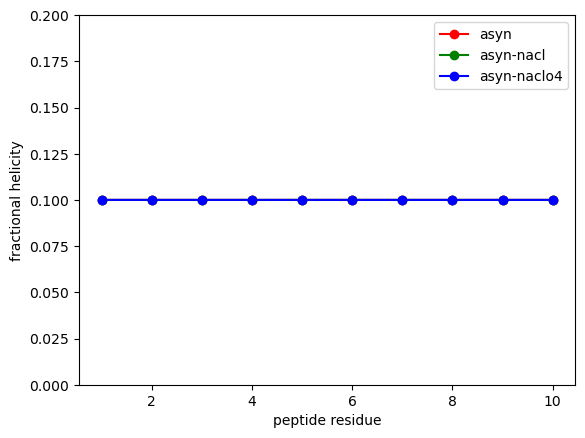

In [69]:
x = np.arange(1, 11)
y1 = np.array(frac_helix1)
y2 = np.array(frac_helix2)
y3 = np.array(frac_helix3)
plt.ylim(0,0.2)
plt.ylabel('fractional helicity')
plt.xlabel('peptide residue')
plt.plot(x, y1, linestyle = '-',marker='o',color = 'r',label='asyn')
plt.plot(x, y2, linestyle = '-',marker='o',color = 'g',label='asyn-nacl')
plt.plot(x, y3, linestyle = '-',marker='o',color = 'b',label='asyn-naclo4')
plt.legend()
plt.show()